In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('credit_default.csv')

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df.columns = df.iloc[0]
df = df[1:]

In [5]:
df.drop(columns=["ID"], inplace=True)
df = df.astype(int)

In [6]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int32
 1   SEX                         30000 non-null  int32
 2   EDUCATION                   30000 non-null  int32
 3   MARRIAGE                    30000 non-null  int32
 4   AGE                         30000 non-null  int32
 5   PAY_0                       30000 non-null  int32
 6   PAY_2                       30000 non-null  int32
 7   PAY_3                       30000 non-null  int32
 8   PAY_4                       30000 non-null  int32
 9   PAY_5                       30000 non-null  int32
 10  PAY_6                       30000 non-null  int32
 11  BILL_AMT1                   30000 non-null  int32
 12  BILL_AMT2                   30000 non-null  int32
 13  BILL_AMT3                   30000 non-null  int32
 14  BILL_A

In [9]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
df.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
df.shape

(30000, 24)

In [12]:
df.nunique()

0
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.duplicated().sum()

35

In [15]:
df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1981,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4586,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6023,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6467,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7320,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8321,360000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
10251,50000,1,2,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13107,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14295,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1
15459,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = df.drop_duplicates(keep='last')

In [17]:
df.duplicated().sum()

0

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_18192\4208835117.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,8))


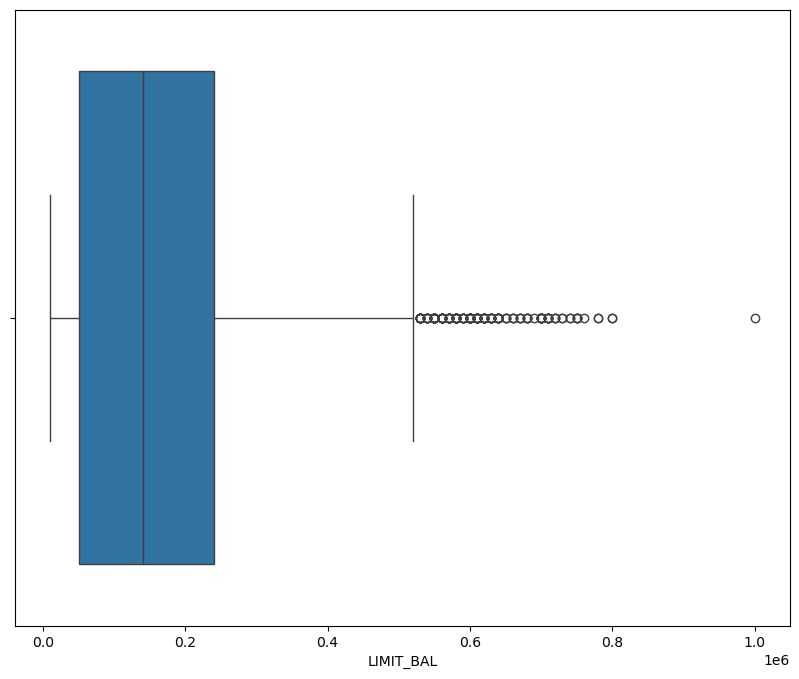

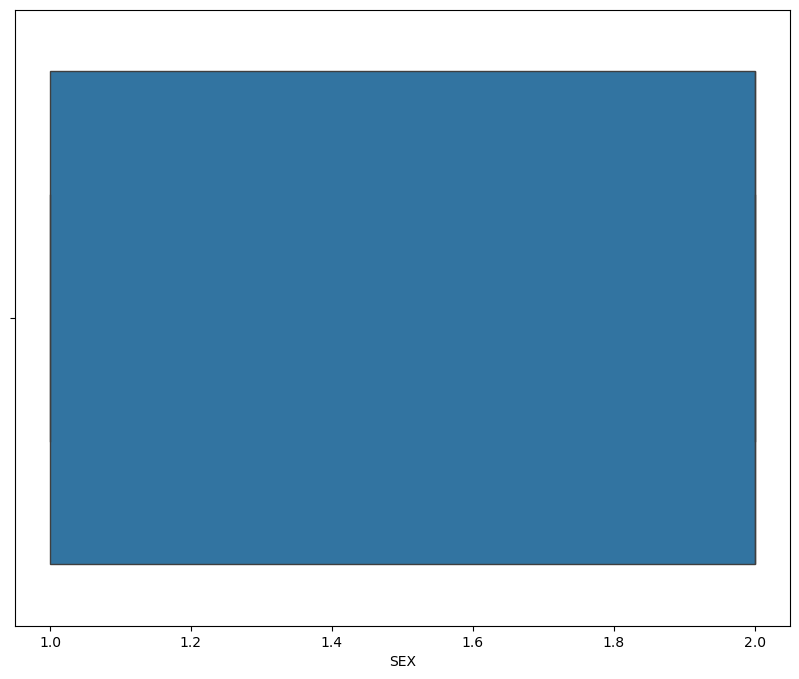

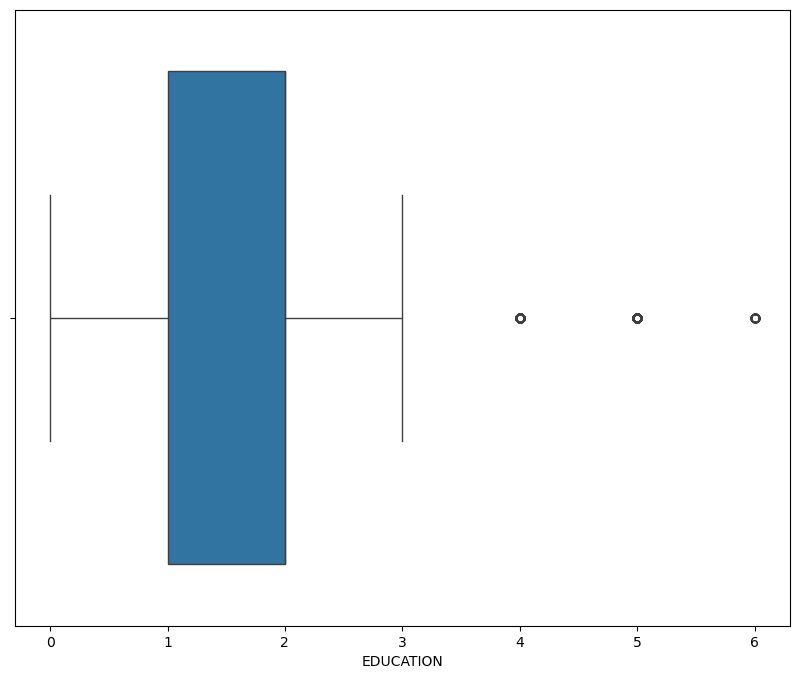

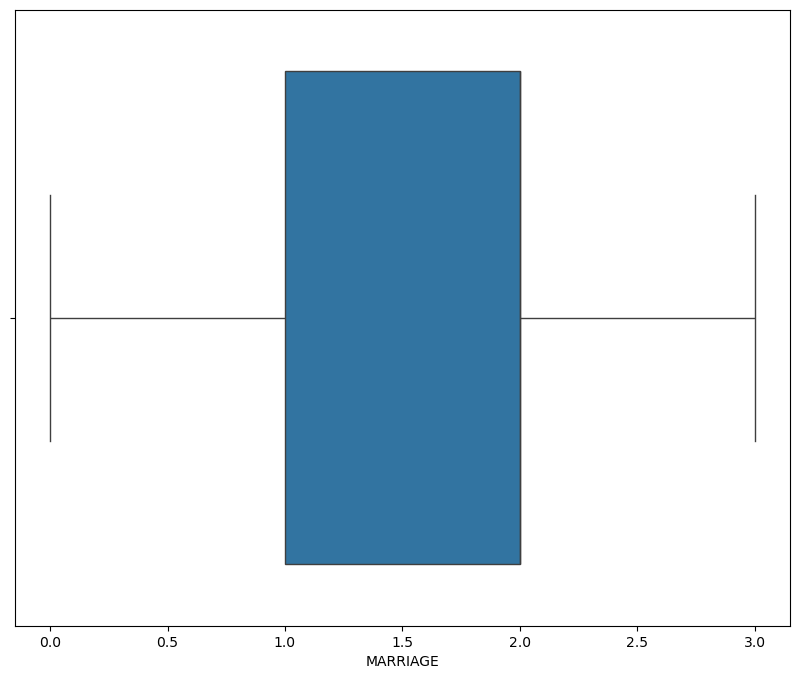

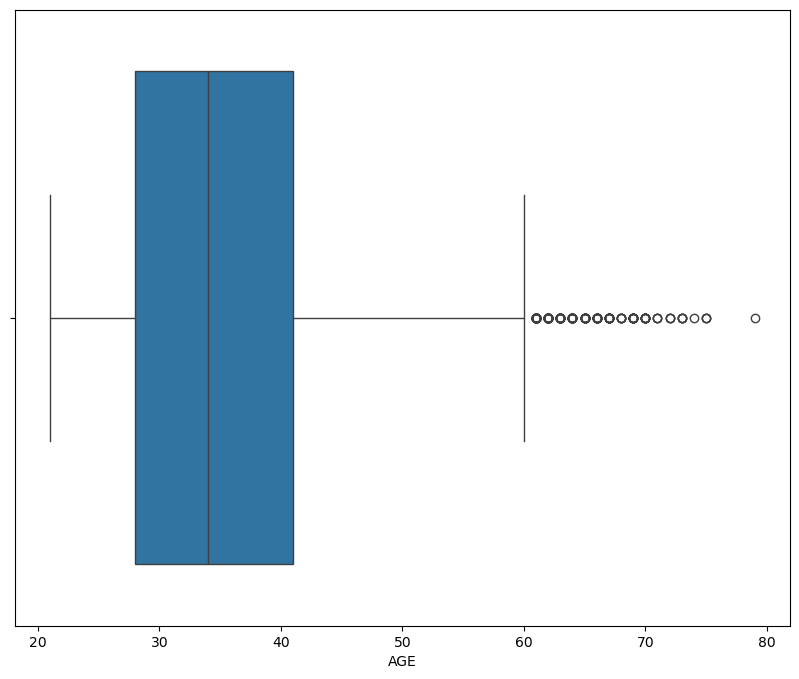

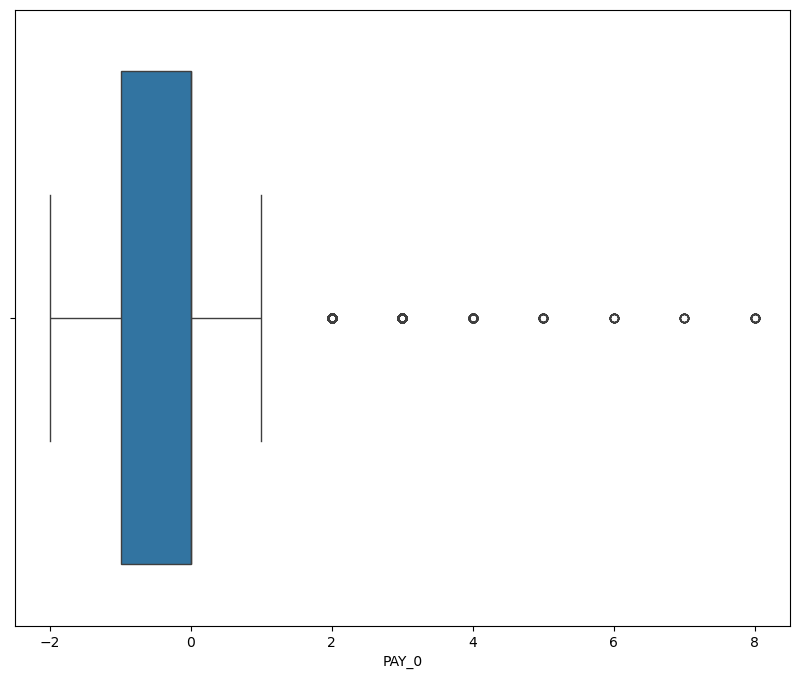

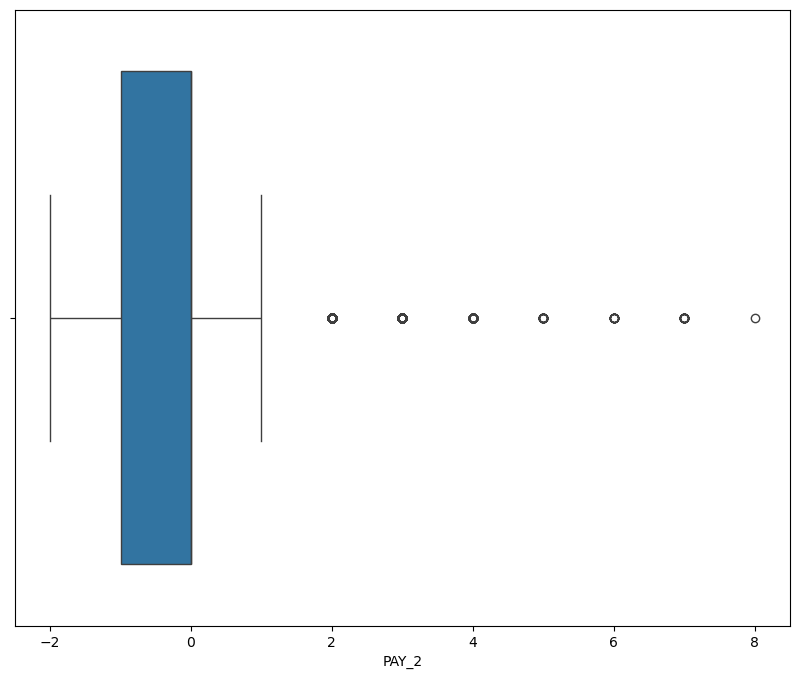

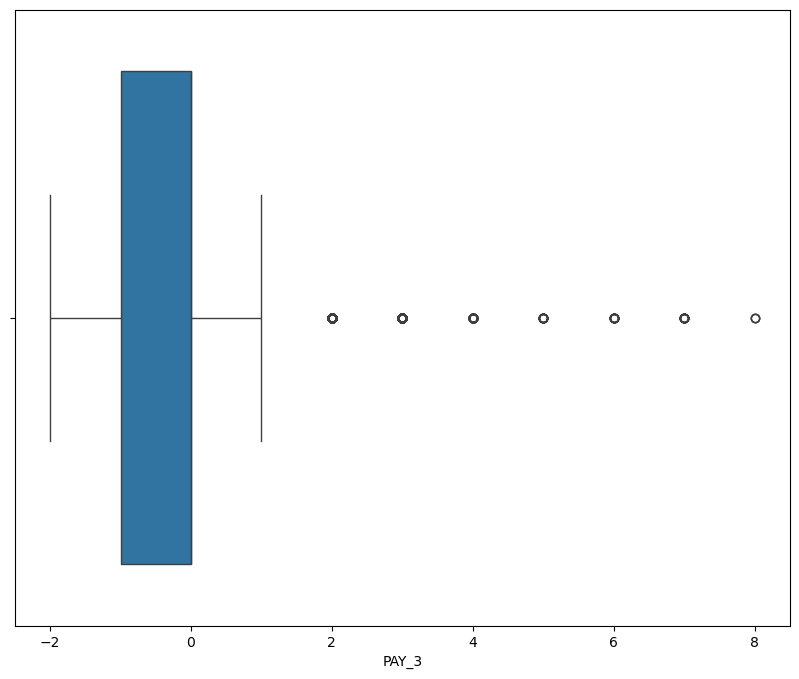

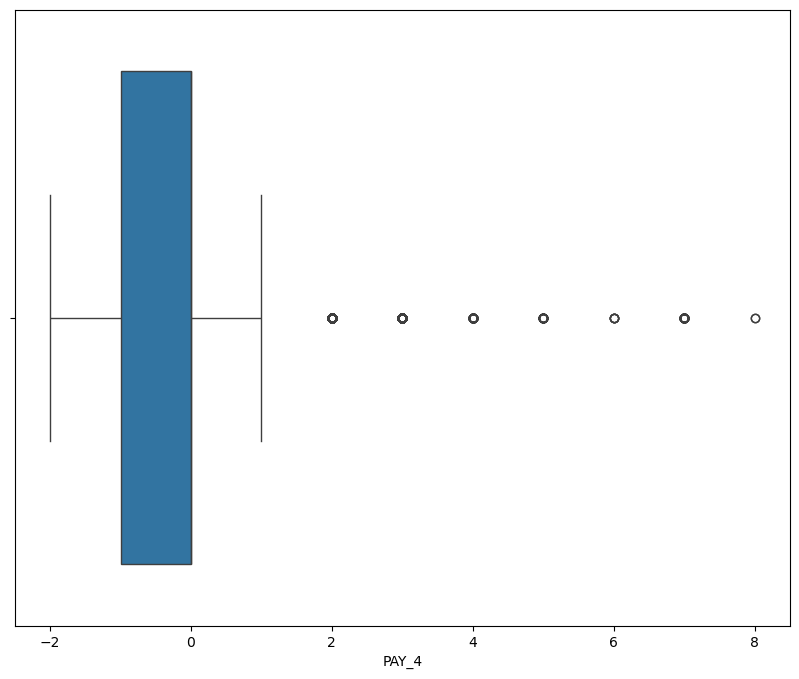

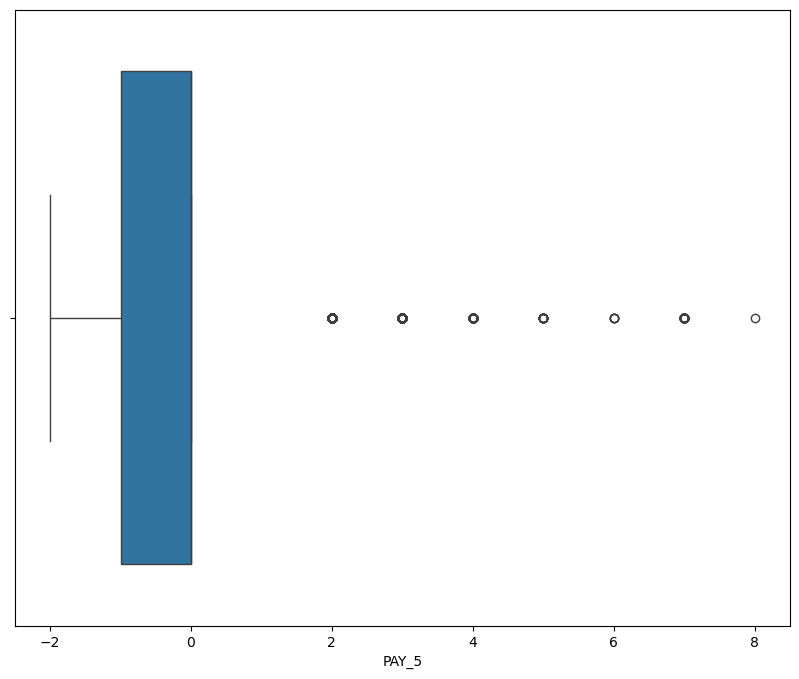

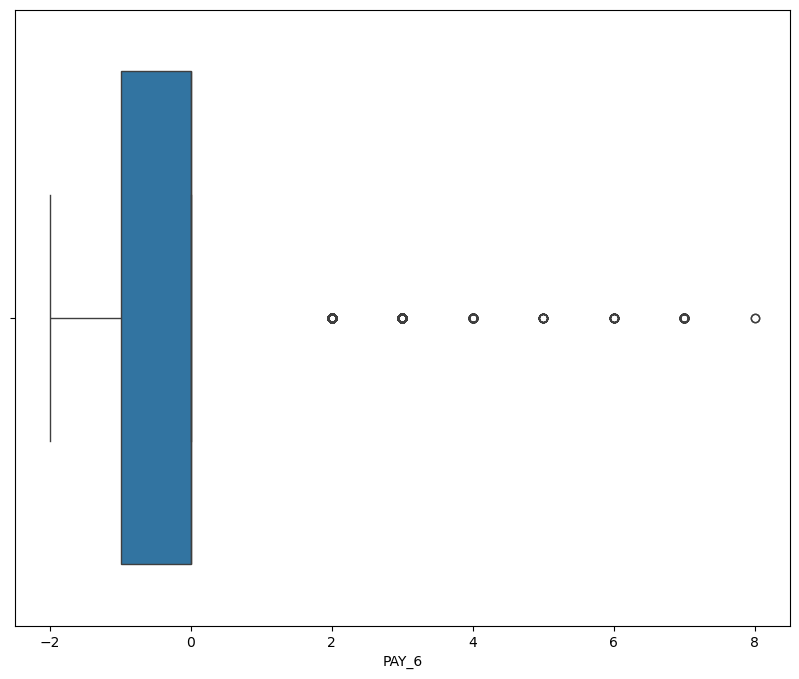

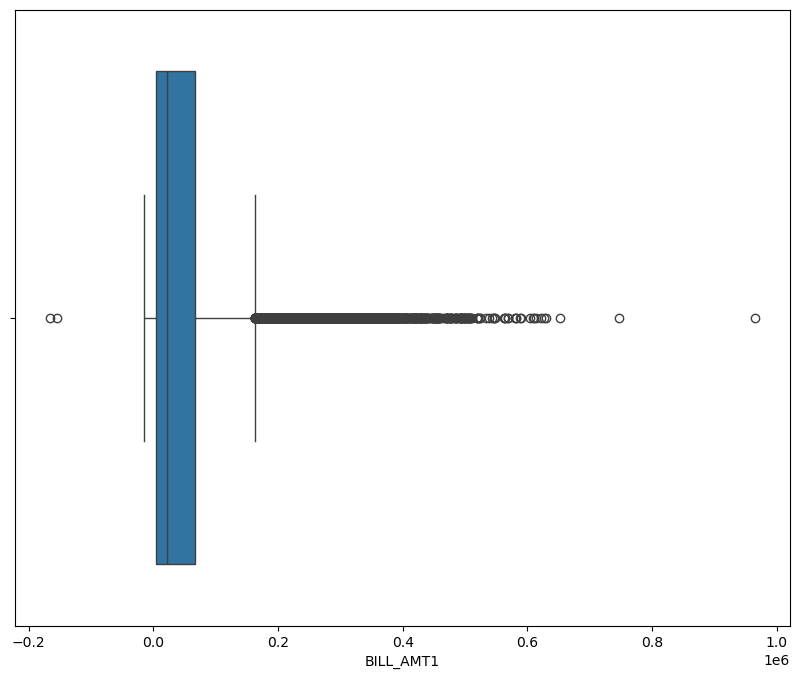

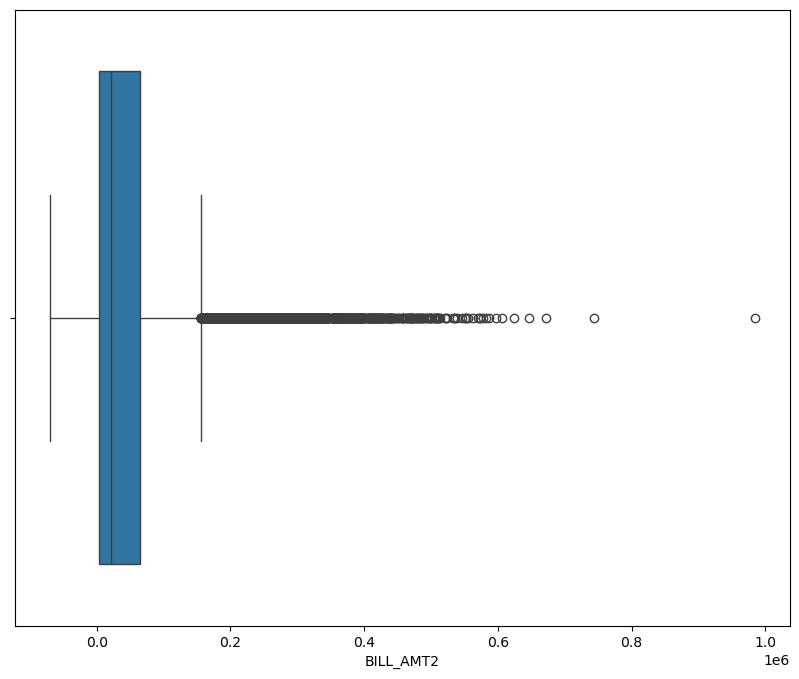

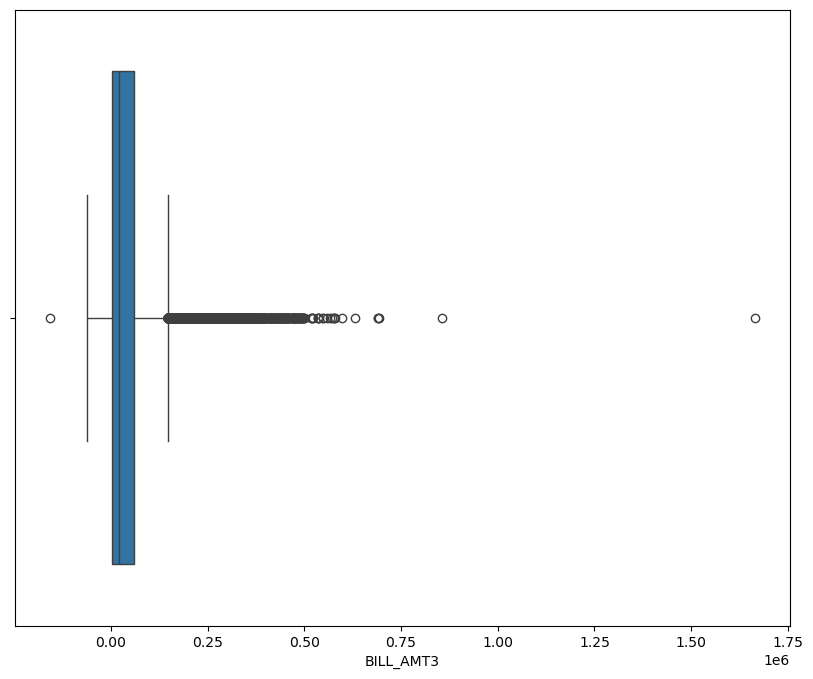

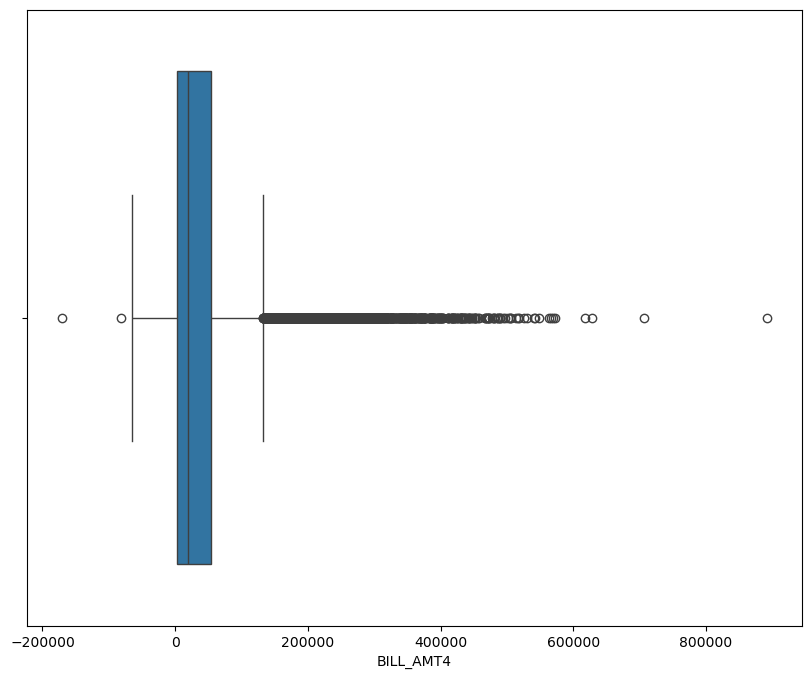

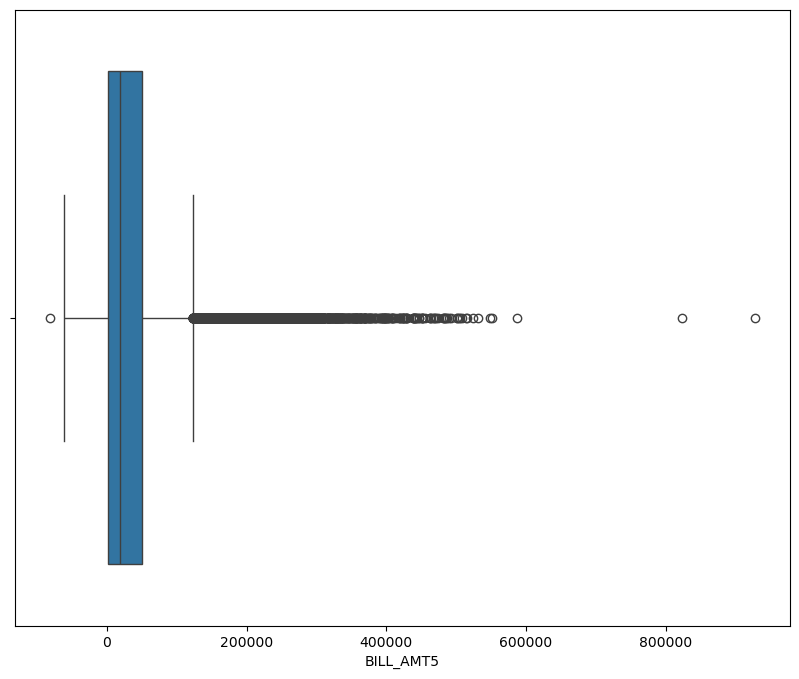

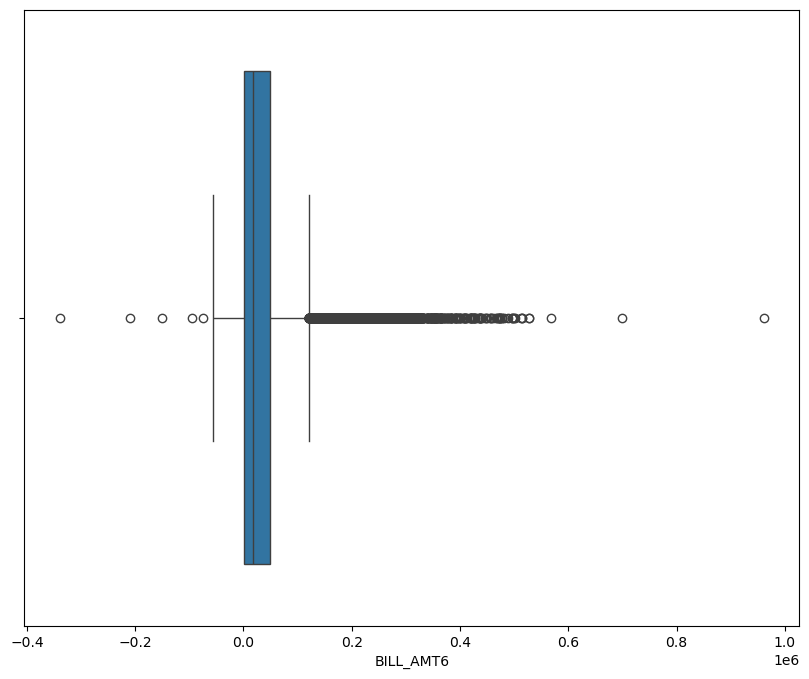

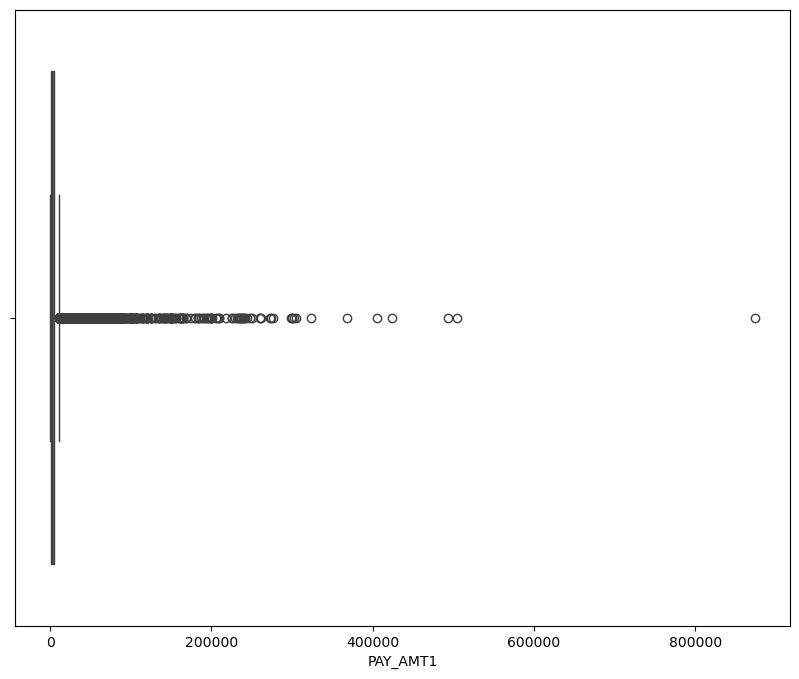

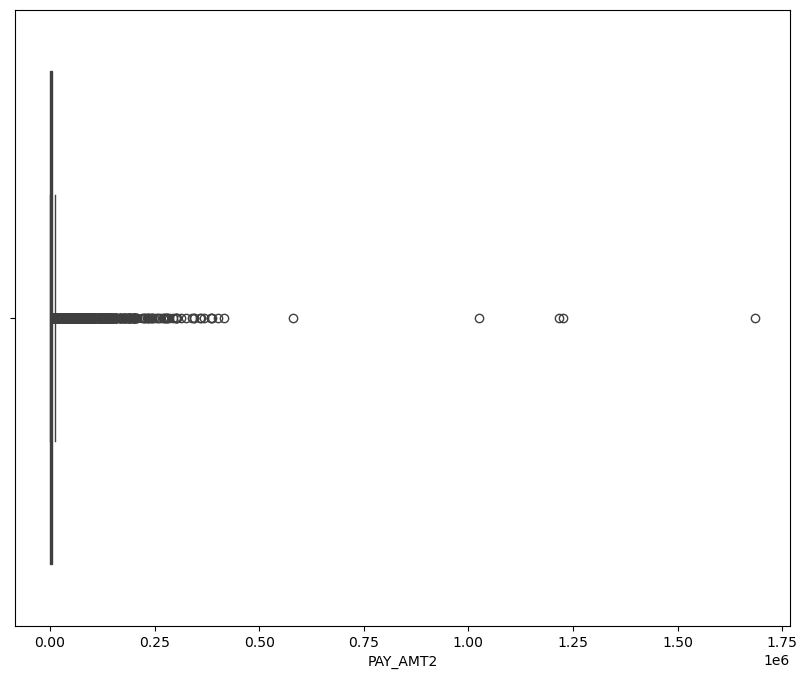

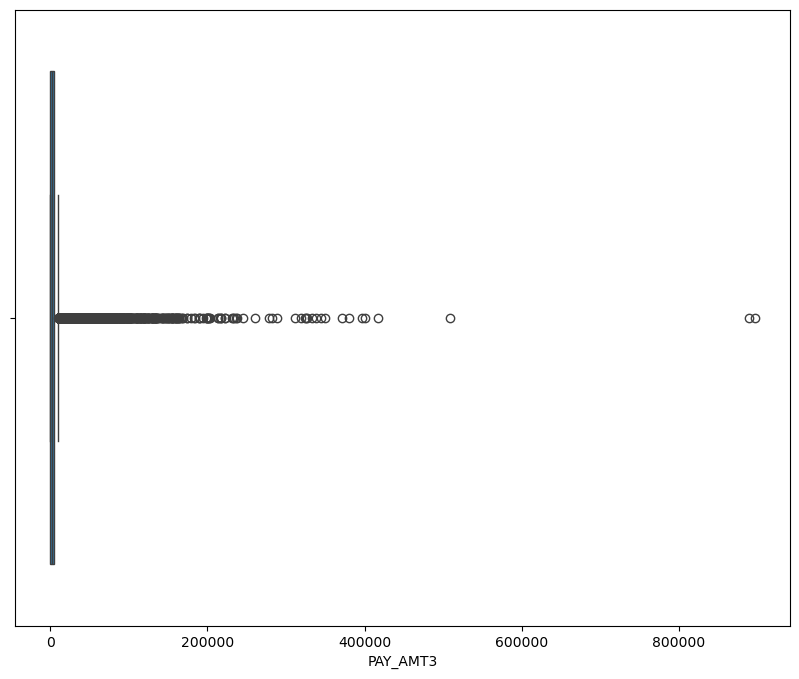

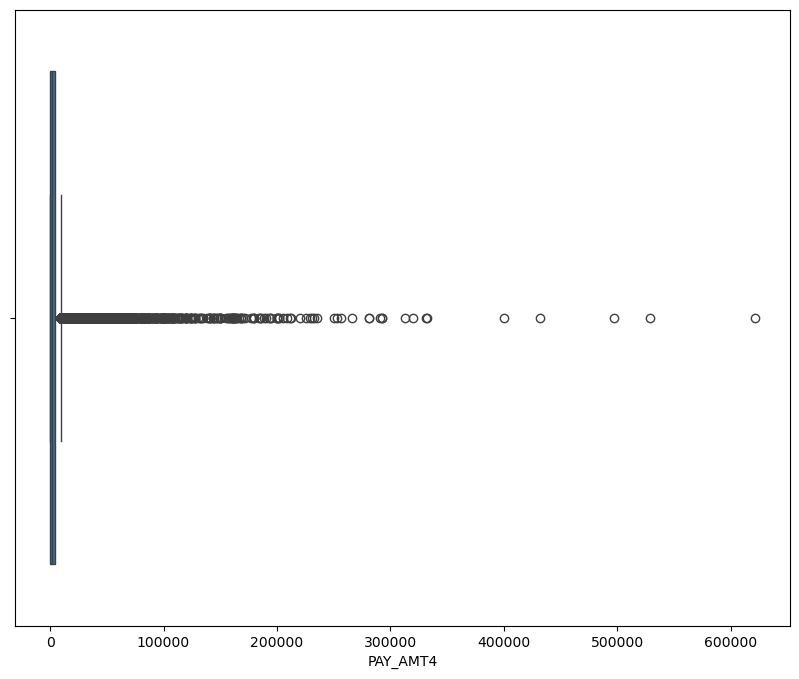

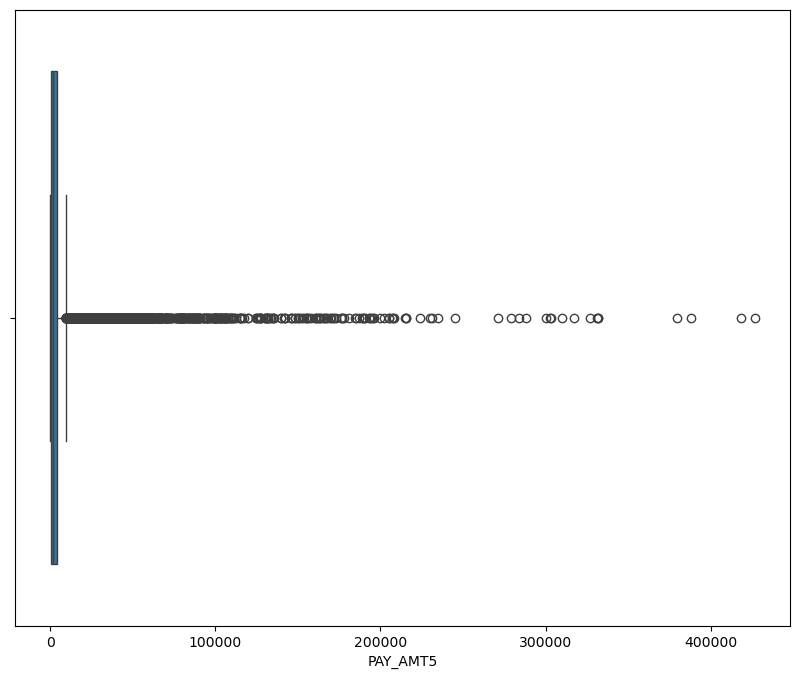

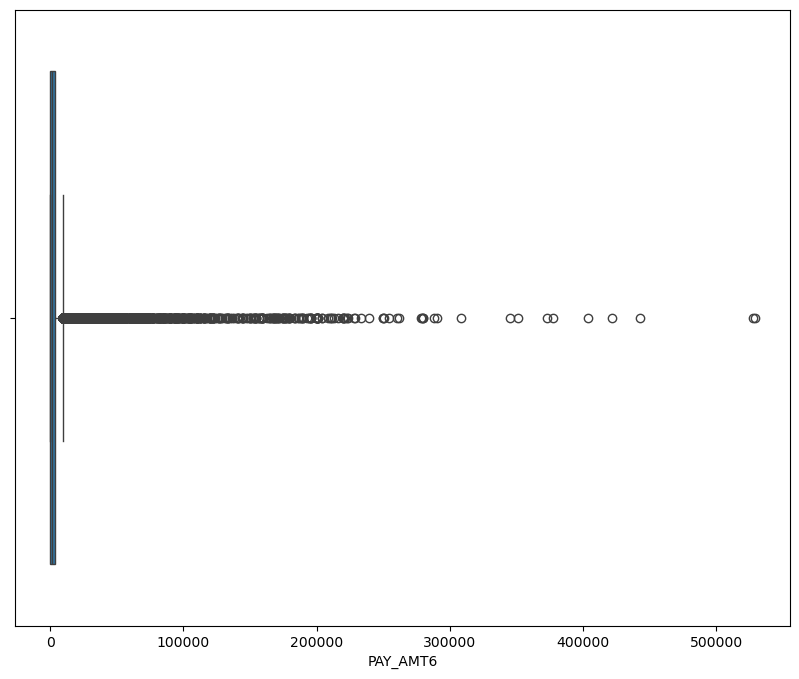

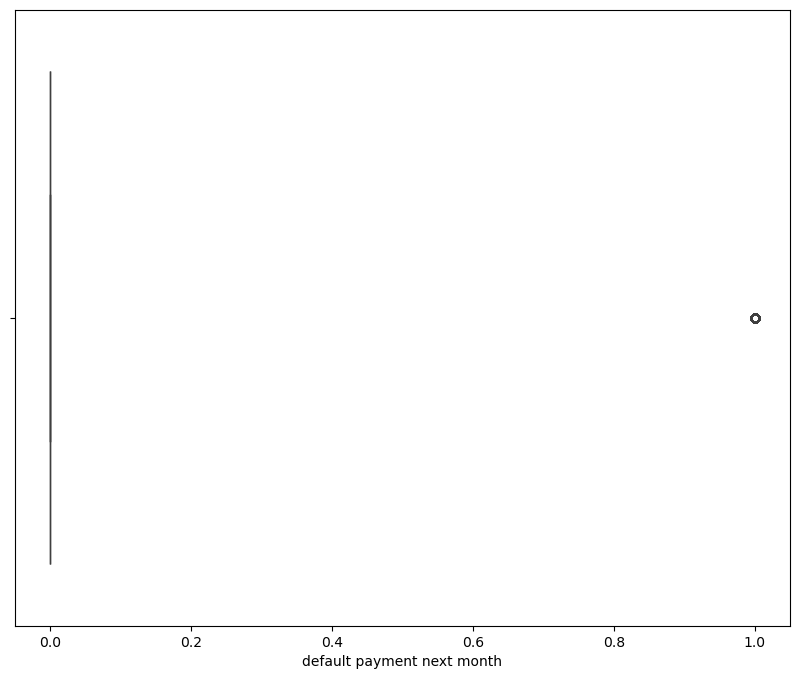

In [18]:
for i in df.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(x= df[i])

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_18192\4069209222.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,8))


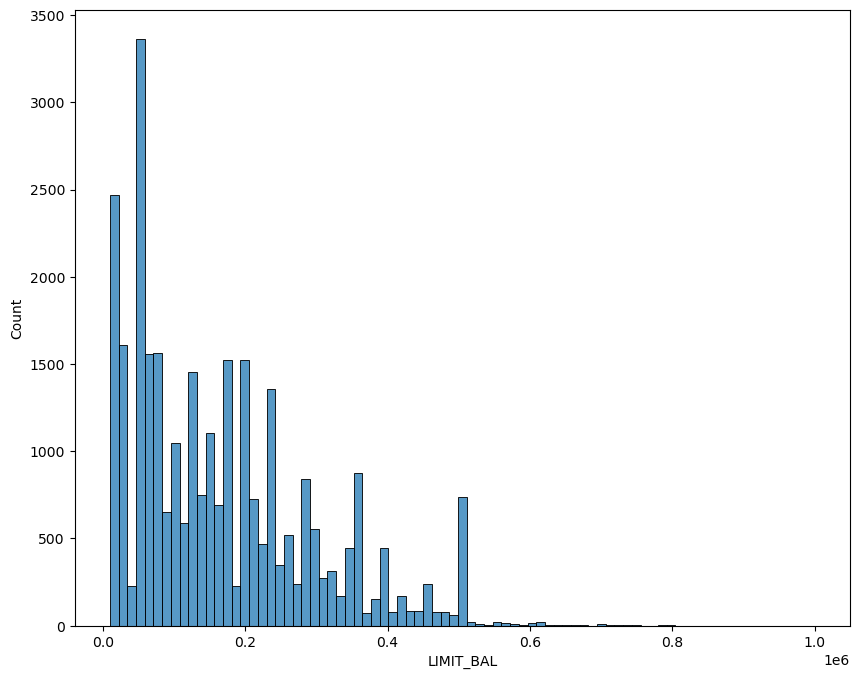

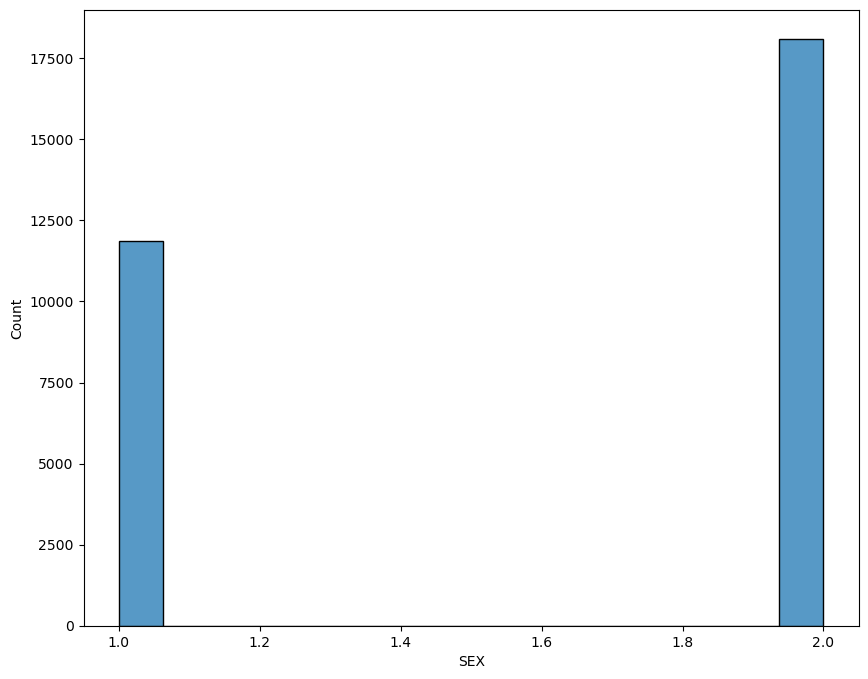

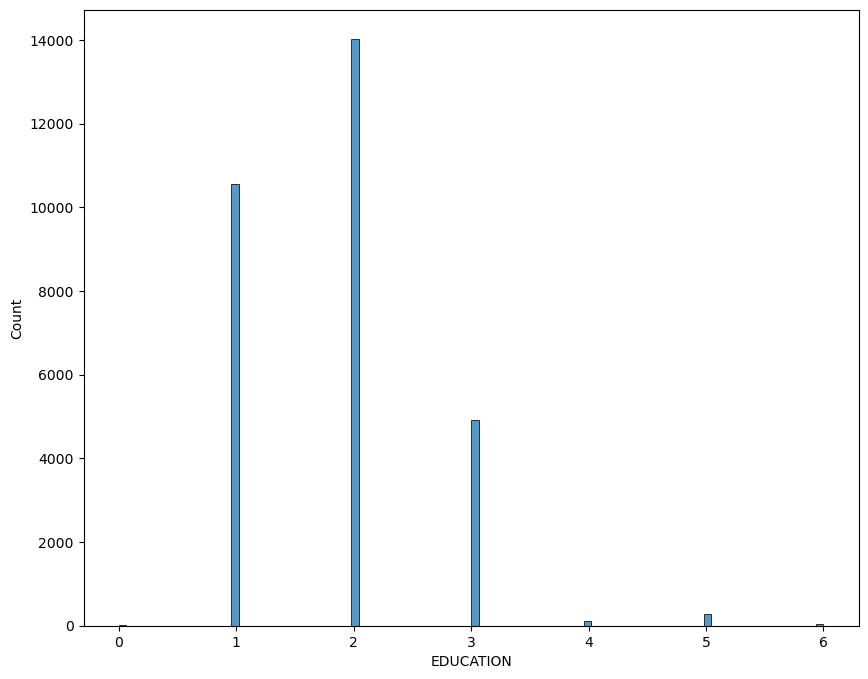

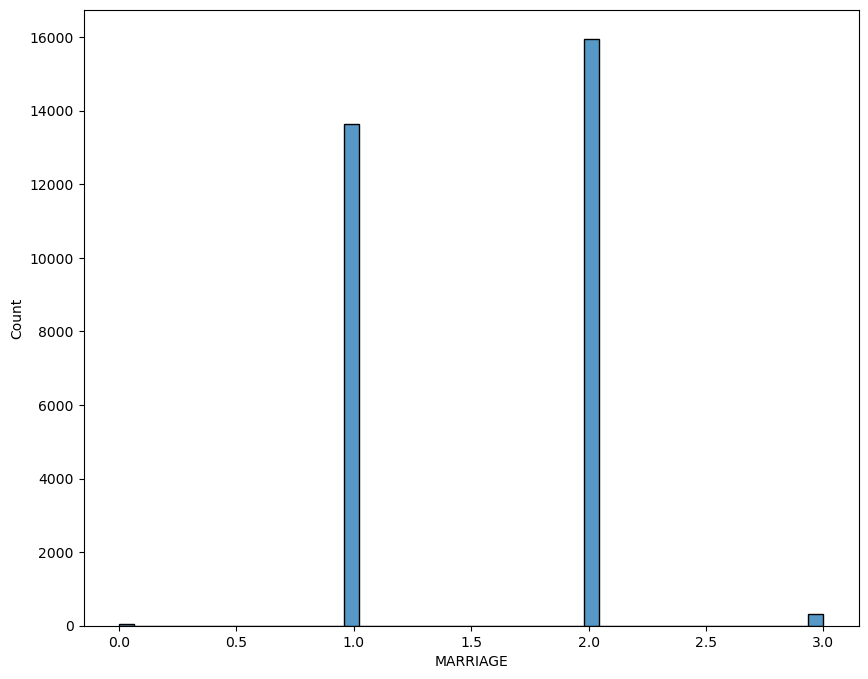

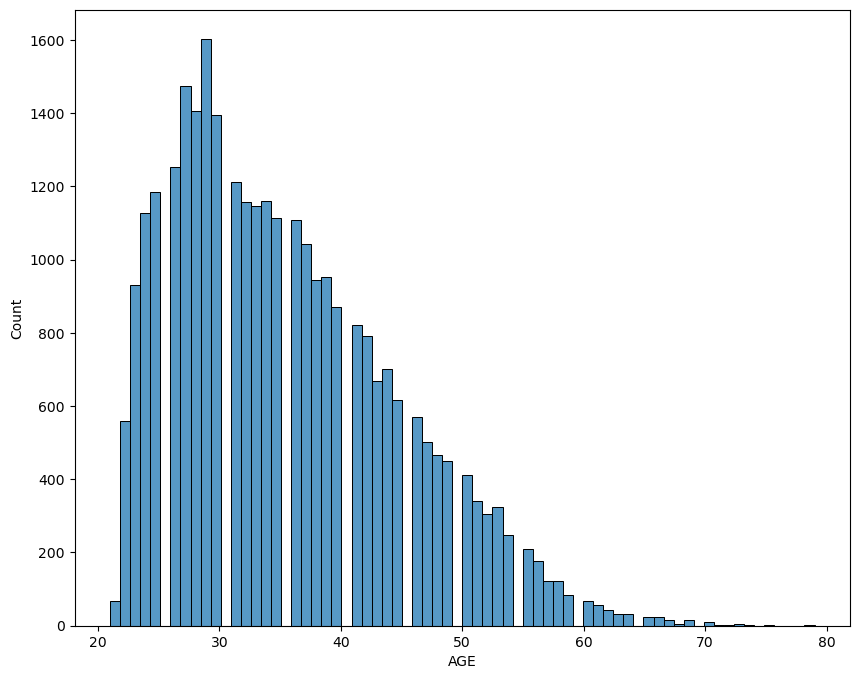

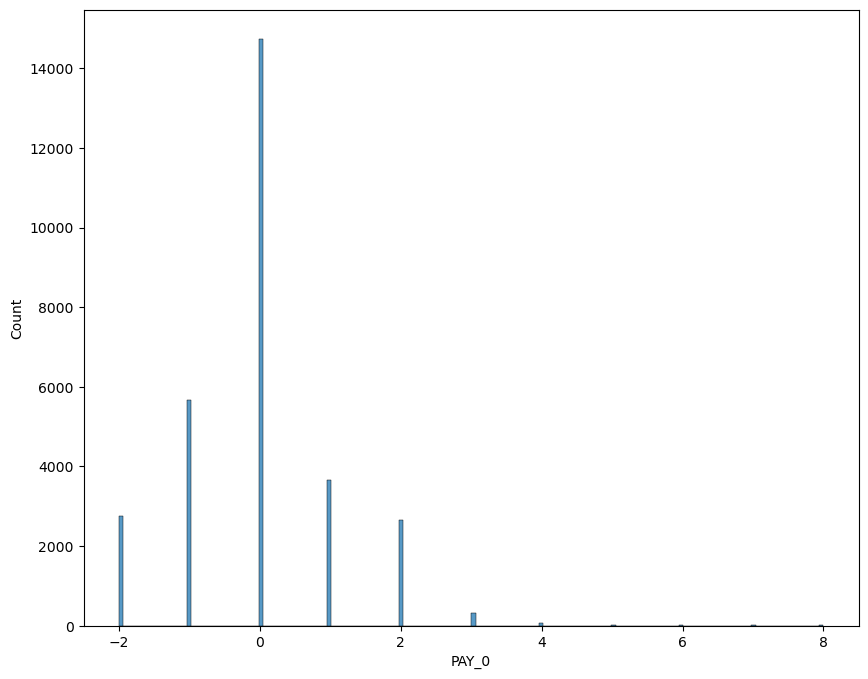

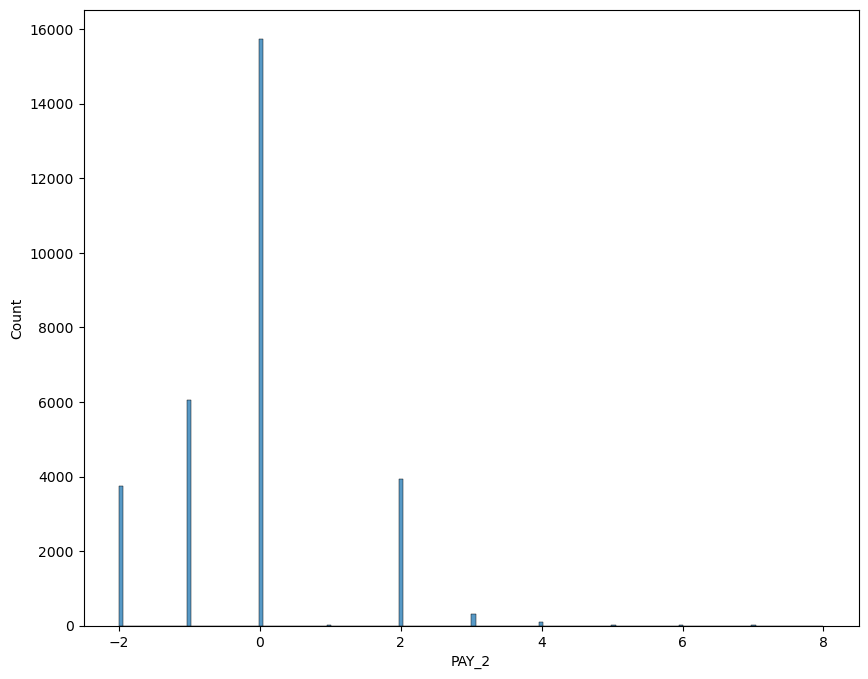

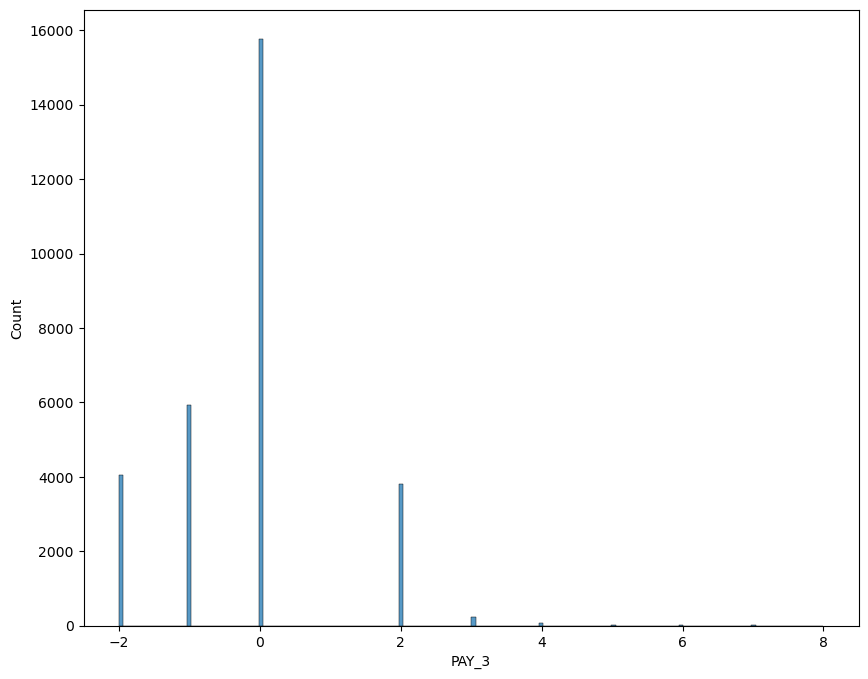

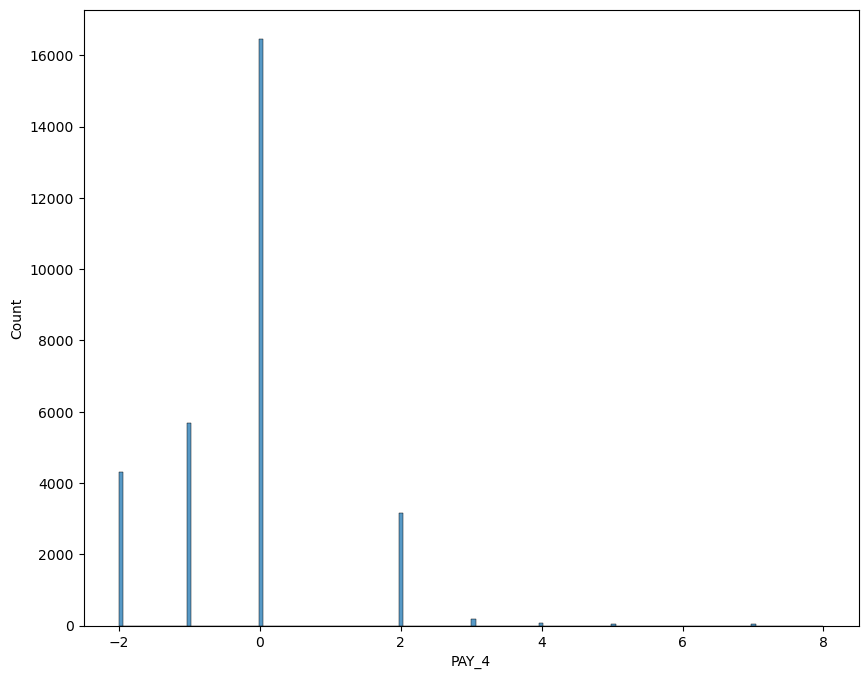

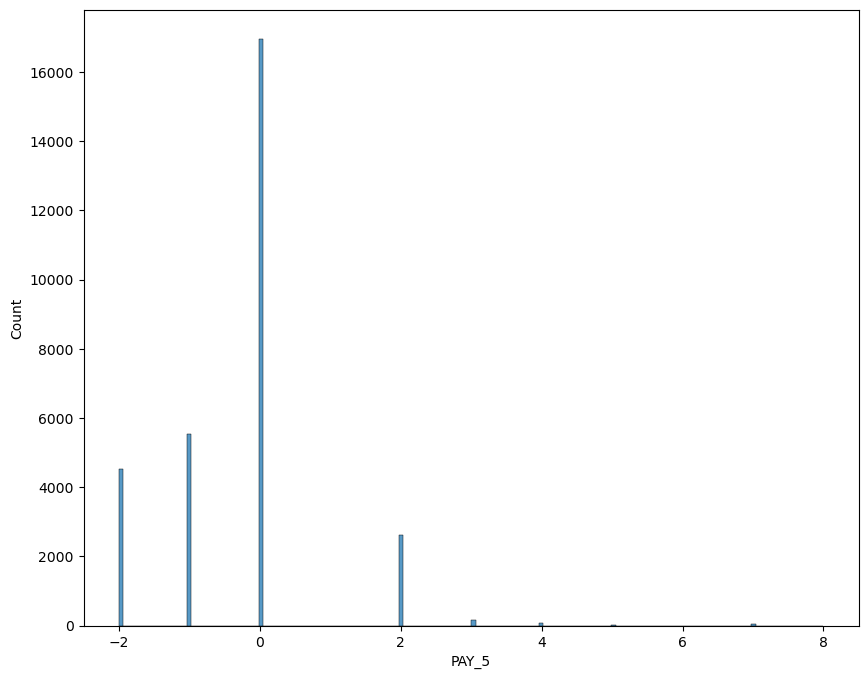

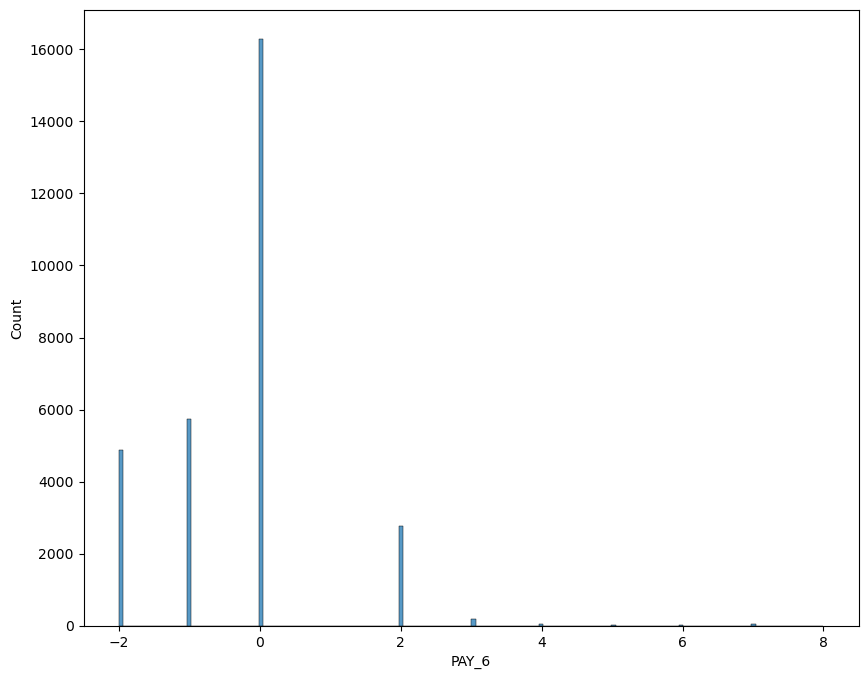

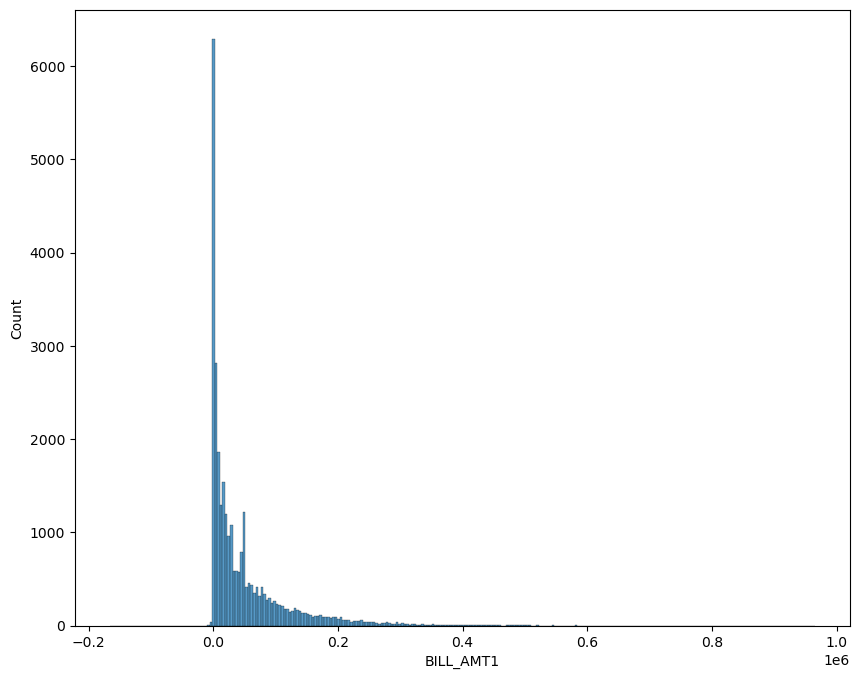

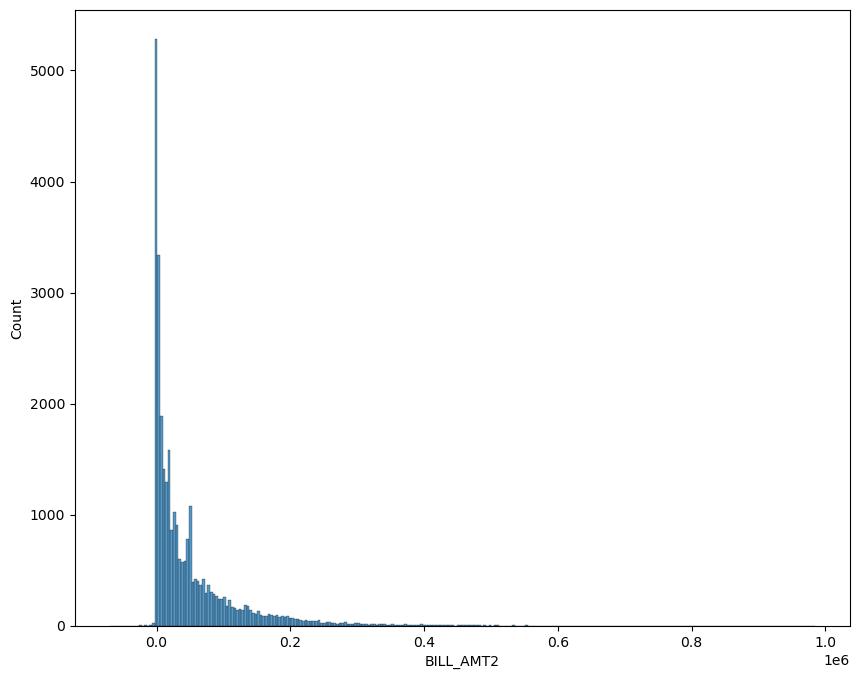

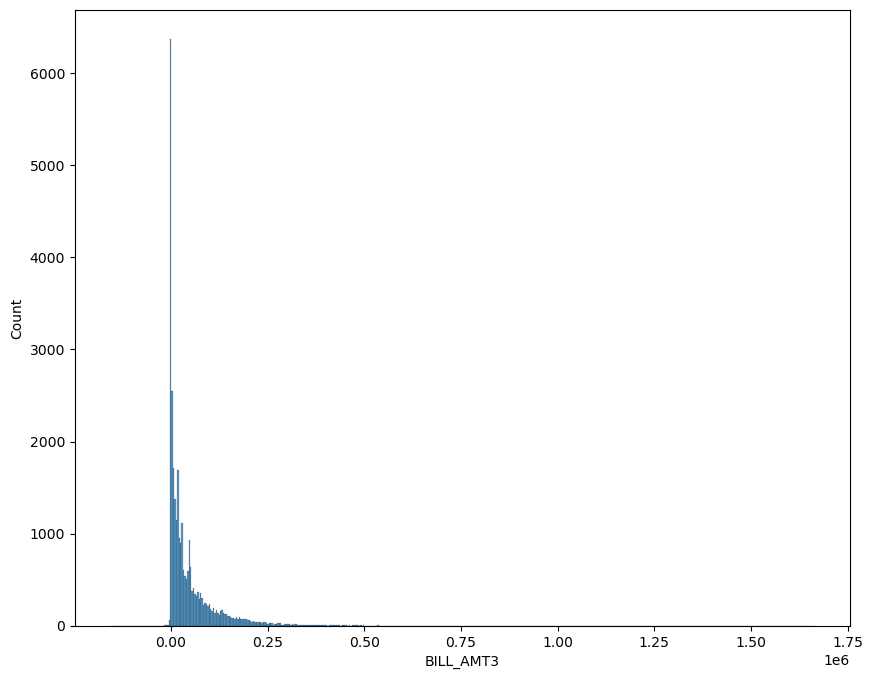

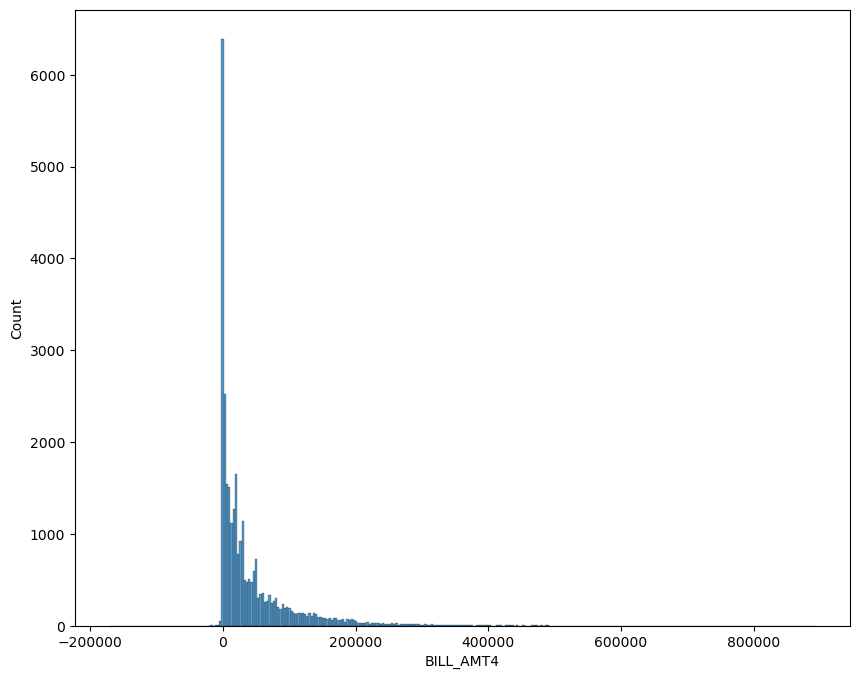

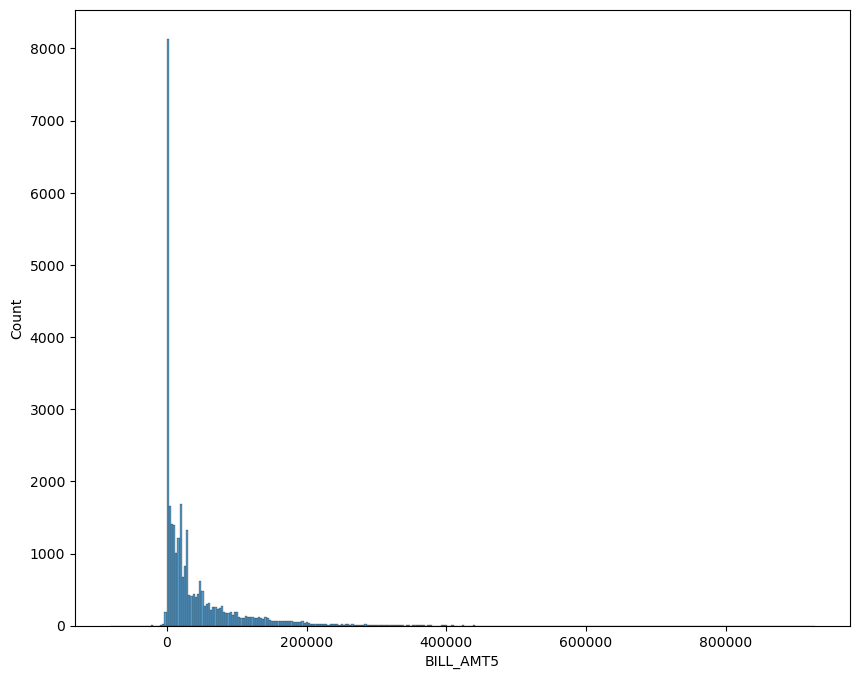

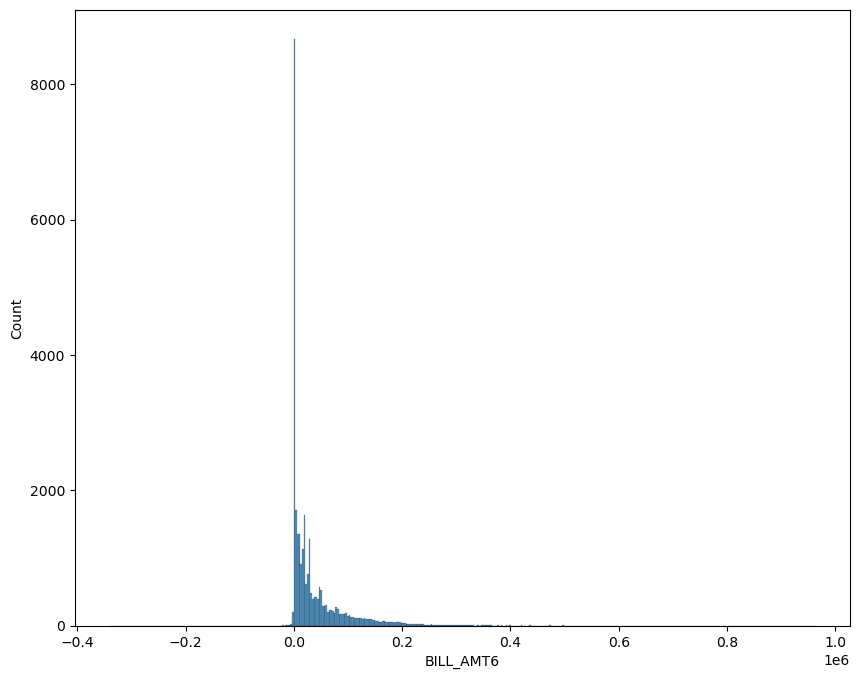

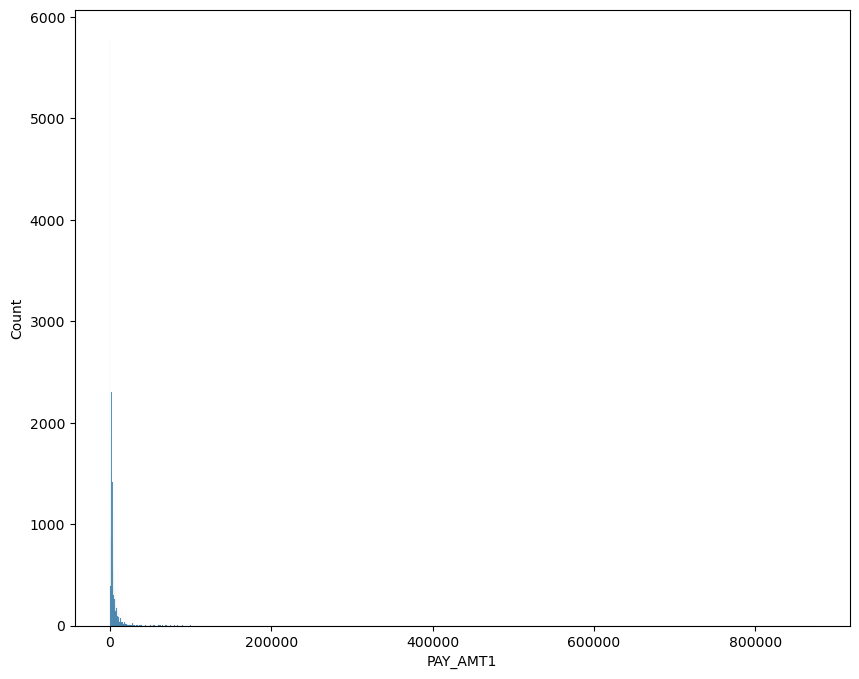

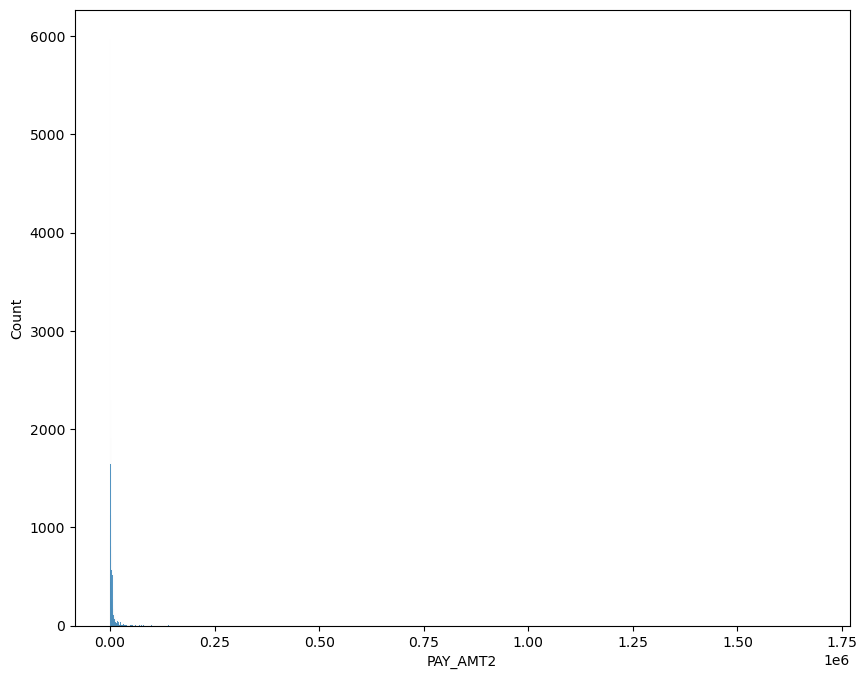

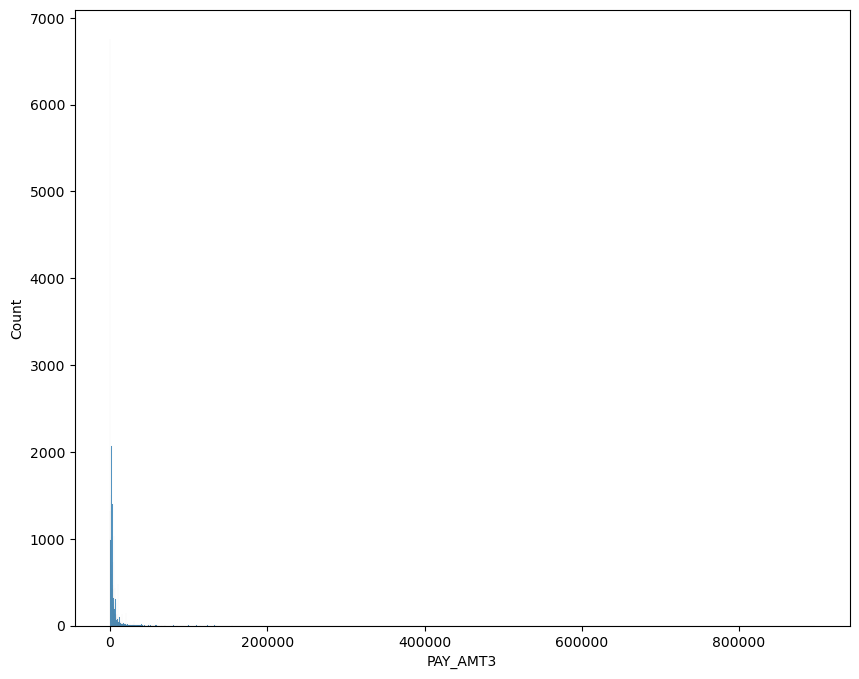

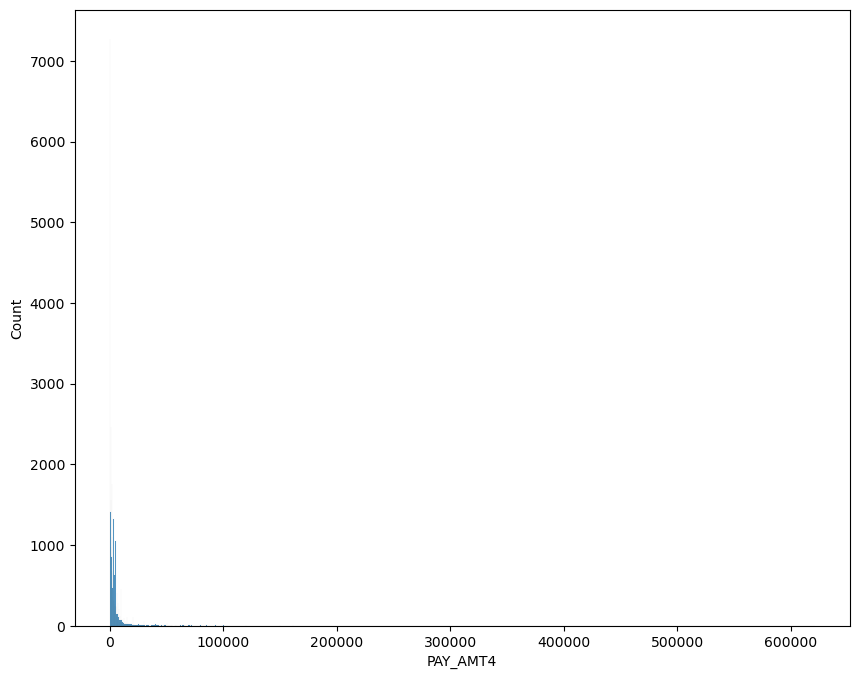

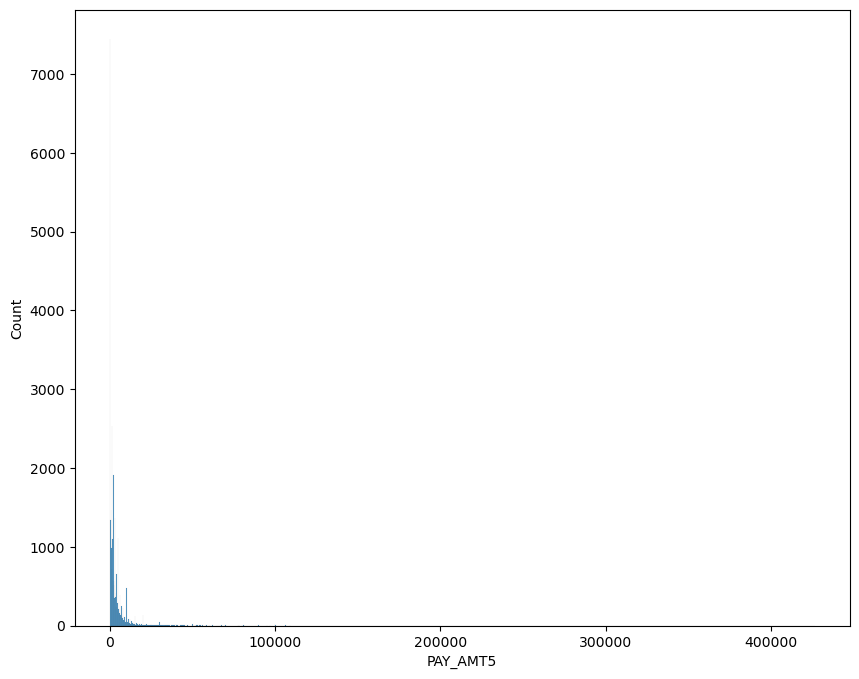

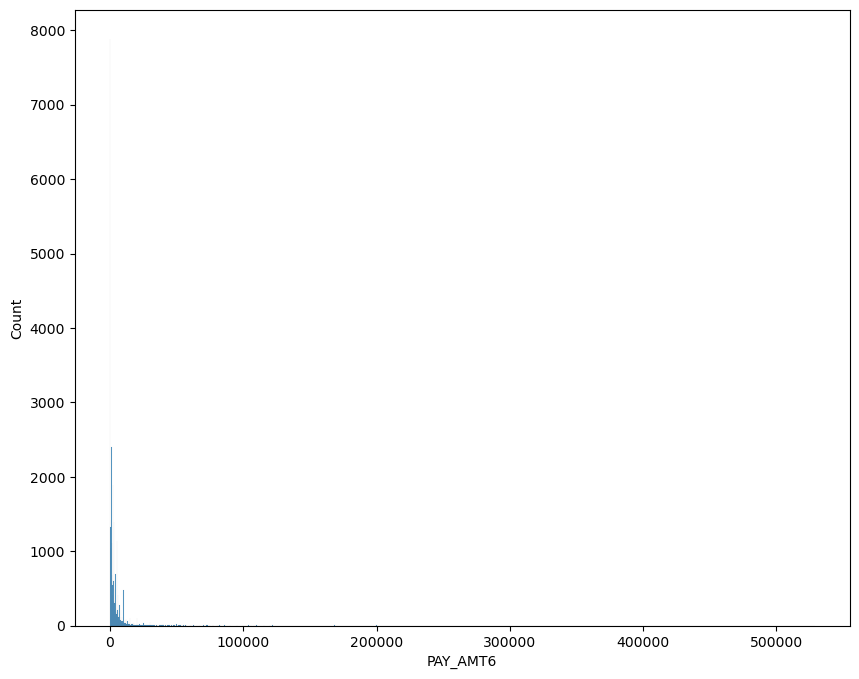

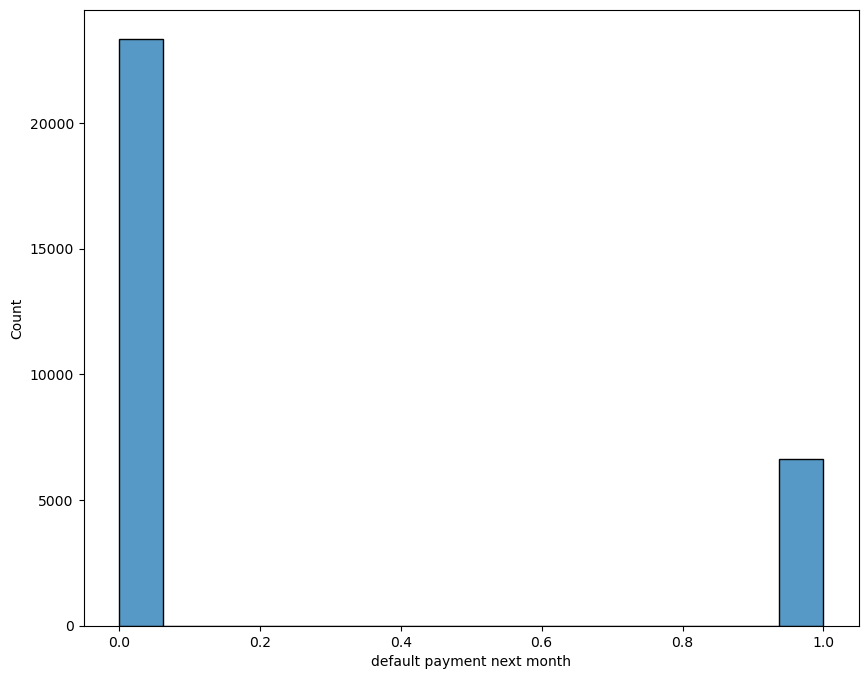

In [19]:
for i in df.columns:
    plt.figure(figsize=(10,8))
    sns.histplot(df[i])

In [20]:
target = 'default payment next month'
num_cols = df.columns.drop(target)

In [21]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
df[num_cols] = df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [23]:
df[num_cols].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,166924.567996,1.603738,1.833306,1.551877,35.451894,-0.094160,-0.230552,-0.257901,-0.302236,-0.337611,...,40174.250859,36609.991156,33802.991891,32644.233005,3501.176506,3423.894143,3040.784549,2721.462139,2735.967662,2715.549174
std,128023.825407,0.489128,0.724379,0.521997,9.107477,0.951423,0.990704,0.994460,0.968578,0.946777,...,46711.194522,42795.178795,39924.114900,39400.352848,3493.804017,3527.904455,3359.514752,3073.955917,3097.544925,3127.250715
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-83524.000000,-76001.500000,-70903.000000,-70723.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2711.000000,2360.000000,1787.000000,1262.000000,1000.000000,850.000000,390.000000,300.000000,261.000000,131.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20135.000000,19081.000000,18130.000000,17124.000000,2102.000000,2010.000000,1804.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,60201.000000,54601.000000,50247.000000,49252.000000,5008.000000,5000.000000,4512.000000,4016.000000,4042.000000,4000.000000
max,525000.000000,2.000000,3.500000,3.000000,60.500000,1.500000,1.500000,1.500000,1.500000,1.500000,...,146436.000000,132962.500000,122937.000000,121237.000000,11020.000000,11225.000000,10695.000000,9590.000000,9713.500000,9803.500000


In [24]:
(df[num_cols].max() > upper_bound).sum()
(df[num_cols].min() < lower_bound).sum()

0

In [25]:
y = df['default payment next month']
X = df.drop(columns='default payment next month',axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('standard',StandardScaler(),num_cols)
    ],remainder='drop'
)

In [28]:
preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object', name=0))])

In [29]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [30]:
model = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    class_weight='balanced'
)

model.fit(X_train_scaled, y_train)


SVC(C=1, class_weight='balanced')

In [31]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4639
           1       0.52      0.62      0.57      1354

    accuracy                           0.79      5993
   macro avg       0.70      0.73      0.71      5993
weighted avg       0.80      0.79      0.79      5993



In [ ]:
y_score = model.decision_function(X_test_scaled)
print("ROC–AUC:", roc_auc_score(y_test, y_score))

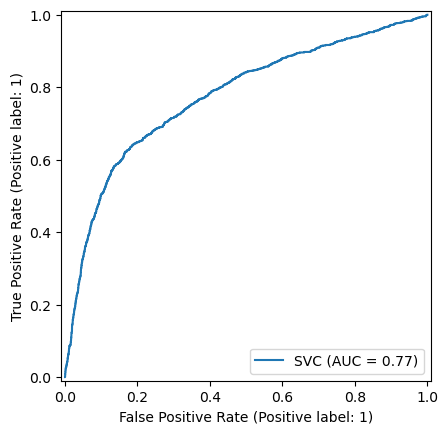

In [ ]:
RocCurveDisplay.from_estimator(
    model, X_test_scaled, y_test
)

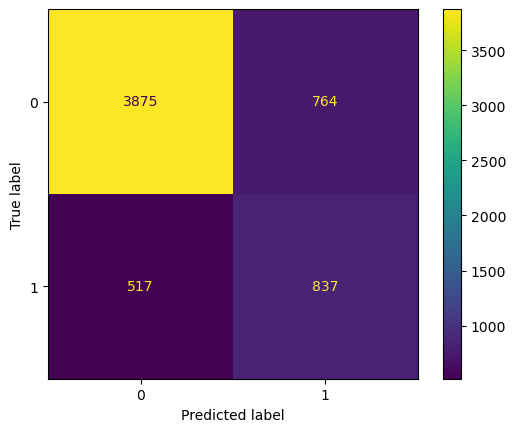

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    model, X_test_scaled, y_test
)